# SGD: бинарная классификация (2 варианта)

**Цель:** показать обучение линейного классификатора методом стохастического градиентного спуска.

**Задания:**
1. Бинарная классификация с SGD по одной точке (логистическая функция потерь).
2. Бинарная классификация с SGD по мини-батчам (экспоненциальная функция потерь).


In [82]:
import numpy as np
import matplotlib.pyplot as plt


## Задача 1 — SGD по одной точке

Логистическая функция потерь, обучение по одной случайной точке на каждой итерации.


In [87]:
# логарифмическая функция потерь
def loss(w, x, y):
    M = np.dot(x, w) * y
    return np.log2(1 + np.exp(-M))


# производная логарифмической функции потерь по вектору w
def df(w, x, y):
    M = np.dot(x, w) * y
    return -(np.exp(-M) * x.T * y) / ((1 + np.exp(-M)) * np.log(2))


def mi (x,w,coord_y):
    predictions = np.dot(x, w)
    margins = predictions * coord_y
    print(f"{margins=}")
    return np.mean(margins < 0)


In [88]:
data_x = [(3.0, 4.9), (2.7, 3.9), (3.0, 5.5), (2.6, 4.0), (2.9, 4.3), (3.1, 5.1), (2.2, 4.5), (2.3, 3.3), (2.7, 5.1), (3.3, 5.7), (2.8, 5.1), (2.8, 4.9), (2.5, 4.5), (2.8, 4.7), (3.2, 4.7), (3.2, 5.7), (2.8, 6.1), (3.6, 6.1), (2.8, 4.8), (2.9, 4.5), (3.1, 4.9), (2.3, 4.4), (3.3, 6.0), (2.6, 5.6), (3.0, 4.4), (2.9, 4.7), (2.8, 4.0), (2.5, 5.8), (2.4, 3.3), (2.8, 6.7), (3.0, 5.1), (2.3, 4.0), (3.1, 5.5), (2.8, 4.8), (2.7, 5.1), (2.5, 4.0), (3.1, 4.4), (3.8, 6.7), (3.1, 5.6), (3.1, 4.7), (3.0, 5.8), (3.0, 5.2), (3.0, 4.5), (2.7, 4.9), (3.0, 6.6), (2.9, 4.6), (3.0, 4.6), (2.6, 3.5), (2.7, 5.1), (2.5, 5.0), (2.0, 3.5), (3.2, 5.9), (2.5, 5.0), (3.4, 5.6), (3.4, 4.5), (3.2, 5.3), (2.2, 4.0), (2.2, 5.0), (3.3, 4.7), (2.7, 4.1), (2.4, 3.7), (3.0, 4.2), (3.2, 6.0), (3.0, 4.2), (3.0, 4.5), (2.7, 4.2), (2.5, 3.0), (2.8, 4.6), (2.9, 4.2), (3.1, 5.4), (2.5, 4.9), (3.2, 5.1), (2.8, 4.5), (2.8, 5.6), (3.4, 5.4), (2.7, 3.9), (3.0, 6.1), (3.0, 5.8), (3.0, 4.1), (2.5, 3.9), (2.4, 3.8), (2.6, 4.4), (2.9, 3.6), (3.3, 5.7), (2.9, 5.6), (3.0, 5.2), (3.0, 4.8), (2.7, 5.3), (2.8, 4.1), (2.8, 5.6), (3.2, 4.5), (3.0, 5.9), (2.9, 4.3), (2.6, 6.9), (2.8, 5.1), (2.9, 6.3), (3.2, 4.8), (3.0, 5.5), (3.0, 5.0), (3.8, 6.4)]
data_y = [1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1]

x_train = np.array([[1, x[0], x[1]] for x in data_x])
y_train = np.array(data_y)

n_train = len(x_train)  # размер обучающей выборки
w = [0.0, 0.0, 0.0]  # начальные весовые коэффициенты
nt = np.array([0.5, 0.01, 0.01])   # шаг обучения для каждого параметра w0, w1, w2
lm = 0.01  # значение параметра лямбда для вычисления скользящего экспоненциального среднего
N = 1000  # число итераций алгоритма SGD


Qe = np.mean(loss(w, x_train, y_train))  # начальное значение среднего эмпирического риска
print(f"{Qe=}")
np.random.seed(0)  # фиксация генератора случайных чисел


Qe=np.float64(1.0)


In [89]:
# Обучение (SGD по одной точке)
Qe_hist = []
for i in range(N):
    k = np.random.randint(0, n_train-1) # n_train - размер выборки (массива x_train)
    ek = loss(w,x_train[k],y_train[k])
    w = w - nt * df(w, x_train[k], y_train[k])
    Qe = lm * ek + (1 - lm) * Qe
    Qe_hist.append(Qe)



Q = mi(x_train,w,y_train)
# Q = average_risk(w, S, coord_y)
print(f"{Qe=},{w=},{Q=}")


margins=array([ 0.10854116,  1.62689071,  1.17798157,  1.43299437,  0.94524298,
        0.44936502,  0.47916893,  2.63370603, -0.51199012,  1.48749289,
        0.49633385,  0.13985371, -0.52613775,  0.21662643,  0.27925153,
        1.50314916,  2.27873454,  2.15348434,  0.03838636,  0.58876285,
       -0.09288488,  0.67306527,  2.0222131 ,  1.41884674,  0.78265919,
        0.23228271,  1.46430692,  1.79098315,  2.64936231,  3.34817496,
        0.4650213 ,  1.38602555,  1.1623253 , -0.03838636,  0.51199012,
        1.4173381 ,  0.79831546,  3.19161221,  1.34056537,  0.26359526,
        1.71270178,  0.64326137,  0.60441912,  0.15550998,  3.13862234,
        0.41052278,  0.42617905,  2.32419472,  0.51199012,  0.3650626 ,
        2.23025707,  1.8596293 ,  0.3650626 ,  1.29359655,  0.66704422,
        0.79018889,  1.37036927,  0.41203142,  0.2949078 ,  1.27041057,
        1.93640203,  1.13913933,  2.03786937,  1.13913933,  0.60441912,
        1.0921705 ,  3.19973879,  0.3948665 ,  1.1234830

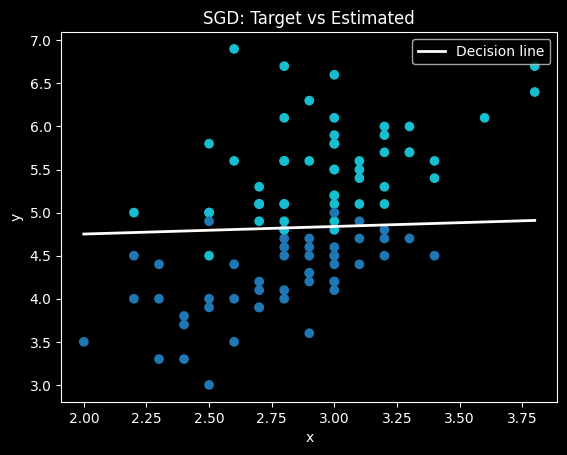

In [90]:
# График: цель и модель (SGD по одной точке)
xs = np.array([p[0] for p in data_x])
ys = np.array([p[1] for p in data_x])

plt.scatter(xs, ys,c=data_y, cmap="tab10")

# линия w0 + w1*x1 + w2*x2 = 0  =>  x2 = -(w0 + w1*x1)/w2
x_line = np.linspace(xs.min(), xs.max(), 200)
x2_line = -(w[0] + w[1]*x_line) / w[2]
plt.plot(x_line, x2_line, color="white", linewidth=2, label="Decision line")
plt.plot()
plt.title("SGD: Target vs Estimated")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


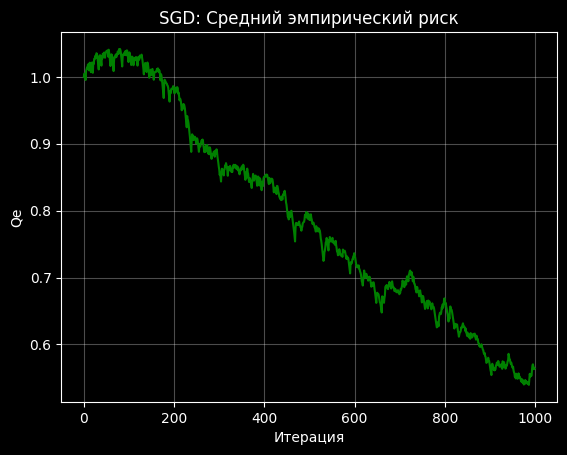

In [91]:
# График: изменение среднего эмпирического риска (SGD по одной точке)
plt.plot(Qe_hist, color='green')
plt.title("SGD: Средний эмпирический риск")
plt.xlabel("Итерация")
plt.ylabel("Qe")
plt.grid(True, alpha=0.3)
plt.show()


## Задача 2 — SGD с мини-батчами

Используем экспоненциальную функция потерь и обновляем веса по небольшим пакетам данных.


In [ ]:
# экспоненциальная функция потерь
def loss(w, x, y):
    M = np.dot(x, w) * y
    return np.exp(-M)

# производная экспоненциальной функции потерь по вектору w
def df(w, x, y):
    M = np.dot(x, w) * y
    return -np.exp(-M) * x.T * y

def mi (x,w,coord_y):
    predictions = np.dot(x, w)
    margins = predictions * coord_y
    return np.mean(margins < 0)


In [ ]:
data_x = [(5.8, 1.2), (5.6, 1.5), (6.5, 1.5), (6.1, 1.3), (6.4, 1.3), (7.7, 2.0), (6.0, 1.8), (5.6, 1.3), (6.0, 1.6), (5.8, 1.9), (5.7, 2.0), (6.3, 1.5), (6.2, 1.8), (7.7, 2.3), (5.8, 1.2), (6.3, 1.8), (6.0, 1.0), (6.2, 1.3), (5.7, 1.3), (6.3, 1.9), (6.7, 2.5), (5.5, 1.2), (4.9, 1.0), (6.1, 1.4), (6.0, 1.6), (7.2, 2.5), (7.3, 1.8), (6.6, 1.4), (5.6, 2.0), (5.5, 1.0), (6.4, 2.2), (5.6, 1.3), (6.6, 1.3), (6.9, 2.1), (6.8, 2.1), (5.7, 1.3), (7.0, 1.4), (6.1, 1.4), (6.1, 1.8), (6.7, 1.7), (6.0, 1.5), (6.5, 1.8), (6.4, 1.5), (6.9, 1.5), (5.6, 1.3), (6.7, 1.4), (5.8, 1.9), (6.3, 1.3), (6.7, 2.1), (6.2, 2.3), (6.3, 2.4), (6.7, 1.8), (6.4, 2.3), (6.2, 1.5), (6.1, 1.4), (7.1, 2.1), (5.7, 1.0), (6.8, 1.4), (6.8, 2.3), (5.1, 1.1), (4.9, 1.7), (5.9, 1.8), (7.4, 1.9), (6.5, 2.0), (6.7, 1.5), (6.5, 2.0), (5.8, 1.0), (6.4, 2.1), (7.6, 2.1), (5.8, 2.4), (7.7, 2.2), (6.3, 1.5), (5.0, 1.0), (6.3, 1.6), (7.7, 2.3), (6.4, 1.9), (6.5, 2.2), (5.7, 1.2), (6.9, 2.3), (5.7, 1.3), (6.1, 1.2), (5.4, 1.5), (5.2, 1.4), (6.7, 2.3), (7.9, 2.0), (5.6, 1.1), (7.2, 1.8), (5.5, 1.3), (7.2, 1.6), (6.3, 2.5), (6.3, 1.8), (6.7, 2.4), (5.0, 1.0), (6.4, 1.8), (6.9, 2.3), (5.5, 1.3), (5.5, 1.1), (5.9, 1.5), (6.0, 1.5), (5.9, 1.8)]
data_y = [-1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1]

x_train = np.array([[1, x[0], x[1]] for x in data_x])
y_train = np.array(data_y)

n_train = len(x_train)  # размер обучающей выборки
w = [0.0, 0.0, 0.0]  # начальные весовые коэффициенты
nt = np.array([0.5, 0.01, 0.01])  # шаг обучения для каждого параметра w0, w1, w2
lm = 0.01  # значение параметра лямбда для вычисления скользящего экспоненциального среднего
N = 500  # число итераций алгоритма SGD
batch_size = 10  # размер мини-батча (K = 10)

Qe = np.mean(loss(w, x_train, y_train))  # начальное значение среднего эмпирического риска
np.random.seed(0)  # фиксация генератора случайных чисел


In [ ]:
# Обучение (SGD с мини-батчами)
Qe_hist = []
for i in range(N):
    k = np.random.randint(0, n_train-batch_size-1) # n_train - размер выборки
    x_batch = x_train[k:k + batch_size]
    Y_batch = y_train[k:k + batch_size]
    ek = np.mean(loss(w,x_batch,Y_batch))
    res = df(w,x_batch,Y_batch)
    w = w - nt * np.mean(df(w, x_batch, Y_batch),axis=1)
    Qe = lm * ek + (1 - lm) * Qe
    Qe_hist.append(Qe)



Q = mi(x_train,w,y_train)
print(f"{Qe=},{w=},{Q=}")


In [ ]:
# График: цель и модель (SGD с мини-батчами)
xs = np.array([p[0] for p in data_x])
ys = np.array([p[1] for p in data_x])

plt.scatter(xs, ys, c=data_y, cmap="tab10",edgecolors='k')

# линия w0 + w1*x1 + w2*x2 = 0  =>  x2 = -(w0 + w1*x1)/w2
x_line = np.linspace(xs.min(), xs.max(), 200)
x2_line = -(w[0] + w[1] * x_line) / w[2]
plt.plot(x_line, x2_line, color="white", linewidth=2, label="Decision line")
plt.plot()
plt.title("SGD: Target vs Estimated")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


In [ ]:

# График: изменение среднего эмпирического риска (SGD с мини-батчами)
plt.plot(Qe_hist, color='green')
plt.title("SGD: Средний эмпирический риск")
plt.xlabel("Итерация")
plt.ylabel("Qe")
plt.grid(True, alpha=0.3)
plt.show()


In [94]:
import numpy as np

x1 = -1
y1 = 4
x2 = 5
y2 = 0

p1 = np.array([1, x1, y1])
p2 = np.array([1, x2, y2])

# Находим их векторное произведение
w = np.cross(p1, p2)
print(w)

[-20   4   6]
